In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "/content/drive/MyDrive/111_人工智慧學程/CNN模型驗證"

# **CNN模型驗證_40**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# df = pd.read_csv("data.csv", index_col=0)
df = pd.read_csv("/content/drive/MyDrive/OysterData_測試數據集_40筆.csv")
df

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from pandas.core.common import flatten
from imutils import paths #路徑檔案管理

In [ ]:
# 讀取儲存圖片的資料夾 /content/drive/MyDrive/牡蠣測試圖庫
imagePaths = sorted(list(paths.list_images('/content/drive/MyDrive/牡蠣測試圖庫'))) #排序
imagePaths.sort(key = len) #依數字順序

In [ ]:
imagePaths

In [ ]:
len(imagePaths)

40

In [ ]:
# 讀取每一張圖片成imgs
imgs = []
for i in imagePaths:

  img = cv2.imread(i)

  imgs.append(img)

In [ ]:
imgs

[array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
  

In [ ]:
# 圖片個數
len(imgs)

40

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
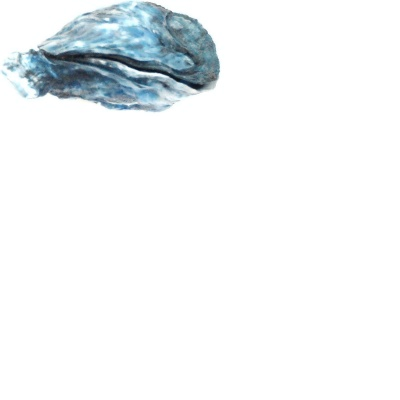

In [ ]:
# 顯示圖片
imgs[0]

In [ ]:
# 圖片通道數
len(imgs[0][0][0])

3

In [ ]:
# 讀取每一筆資料的各項特徵
Total_weight = df.iloc[:,-5].values
Volume = df.iloc[:,-6].values
Area = df.iloc[:,-7].values

Length = df.iloc[:,-10].values
Width = df.iloc[:,-9].values
Height = df.iloc[:,-8].values

In [ ]:
Total_weight

array([37.7, 33. , 55.7, 57.7, 36.1, 41.3, 37.7, 31. , 56.5, 53.5, 53.6,
       37.7, 35.1, 38.7, 56.8, 38.5, 30. , 36.1, 31.1, 30.2, 43.7, 27.9,
       28.8, 44. , 29.8, 52.1, 35.3, 51.2, 35.6, 34.7, 40.4, 53.6, 34.7,
       44.3, 31.1, 26.8, 40. , 24.2, 31.8, 24.4])

In [ ]:
Volume

array([120.768,  79.704, 129.584, 157.604, 113.176, 111.328,  92.752,
        72.27 ,  92.796,  95.7  , 118.56 ,  81.984,  78.1  ,  64.512,
       133.488, 144.768,  57.96 ,  90.528,  90.85 ,  58.56 , 178.2  ,
        71.896,  64.923,  99.6  ,  81.   ,  97.2  ,  70.965, 102.6  ,
        94.5  , 106.704,  82.087, 108.68 ,  72.   , 129.5  ,  63.756,
       132.3  ,  99.96 ,  53.856,  88.55 ,  65.52 ])

In [ ]:
Area

array([32.64, 33.21, 46.28, 50.84, 40.42, 34.79, 42.16, 32.85, 42.18,
       38.28, 39.52, 29.28, 35.5 , 40.32, 49.44, 45.24, 25.2 , 37.72,
       39.5 , 24.4 , 54.  , 32.68, 34.17, 39.84, 33.75, 40.5 , 37.35,
       54.  , 33.75, 39.52, 35.69, 41.8 , 28.8 , 35.  , 28.98, 37.8 ,
       35.7 , 31.68, 38.5 , 31.2 ])

In [ ]:
Length

array([ 6.8,  8.1,  8.9,  8.2,  8.6,  7.1,  6.8,  7.3,  7.4,  6.6,  7.6,
        6.1,  7.1,  8.4, 10.3,  7.8,  6. ,  8.2,  7.9,  6.1, 10. ,  7.6,
        6.7,  8.3,  7.5,  8.1,  8.3,  9. ,  7.5,  7.6,  8.3,  7.6,  6.4,
        7. ,  6.9,  7. ,  7. ,  6.6,  7.7,  6.5])

In [ ]:
Width

array([4.8, 4.1, 5.2, 6.2, 4.7, 4.9, 6.2, 4.5, 5.7, 5.8, 5.2, 4.8, 5. ,
       4.8, 4.8, 5.8, 4.2, 4.6, 5. , 4. , 5.4, 4.3, 5.1, 4.8, 4.5, 5. ,
       4.5, 6. , 4.5, 5.2, 4.3, 5.5, 4.5, 5. , 4.2, 5.4, 5.1, 4.8, 5. ,
       4.8])

In [ ]:
Height

array([2.5, 3.6, 2.1, 2.4, 2.3, 2.3, 2.1, 2.4, 1.9, 1.8, 2.5, 2.2, 2.9,
       3.3, 2.3, 2.1, 3.4, 2.1, 2.3, 1.7, 1.8, 2.1, 2.1, 1.9, 2.1, 2.3,
       1.9, 2.6, 2.8, 2.2, 2.4, 2.3, 2.1, 2.1, 2.7, 2.3, 2. , 2. , 2.4,
       1.5, 1.6, 3.1, 1.6, 2.2, 2.6, 2.7, 2.4, 2. , 2.5, 1.7, 3.1, 2.7,
       2.1, 3. , 1.9, 1.8, 2.1, 2.6, 1.8, 2.8, 2.2, 2. , 1.7, 2. , 1.7,
       2.2, 2.4, 2.1, 1.8, 1.9, 2.1, 2.3, 2.1, 1.9, 1.8, 2.2, 2.4, 2.2,
       1.9, 1.8, 1.8, 2.2, 2.2, 2.5, 1.9, 2.4, 2. , 2. , 1.7, 2.5, 2.3,
       2.4, 1.8, 2.1, 2. , 2.7, 2.4, 2.3, 2. , 2.3, 2.3, 1.7, 2.1, 2.1,
       1.8, 2. , 1.5, 2.4, 2.2, 2. , 2.4, 2.6, 2.4, 2.6, 1.6, 2.3, 2.3,
       3.5, 1.7, 2.6, 2.4, 2. , 2. , 2.4, 2.3, 1.6, 2.3, 1.6, 2.2, 2.2,
       2.5, 3.6, 2.1, 2.4, 2.3, 2.3, 2.1, 2.4, 1.9, 1.8, 2.5, 2.2, 2.9,
       3.3, 2.3, 2.1, 3.4, 2.1, 2.3, 1.7, 1.8, 2.1, 2.1, 1.9, 2.1, 2.3,
       1.9, 2.6, 2.8, 2.2, 2.4, 2.3, 2.1, 2.1, 2.7, 2.3, 2. , 2. , 2.4,
       1.5, 1.6, 3.1, 1.6, 2.2, 2.6, 2.7, 2.4, 2. , 2.5, 1.7, 3.

In [ ]:
# 異質特徵融合(HFF)

for img_index in range(len(imgs)): # 走訪每一張圖像，對每一張圖像執行HFF
  count1 = 0
  for count1 in range(len(imgs[img_index])): # 將Total_weight標籤放入圖像倒數第3行
    imgs[img_index][count1][-3][:] = Total_weight[img_index]
    count1 = count1 + 1

  count3 = 0
  for count3 in range(len(imgs[img_index])): # 將Volume標籤放入圖像倒數第2行
    imgs[img_index][count3][-2][:] = Volume[img_index]
    count3 = count3 + 1

  count4 = 0
  for count4 in range(len(imgs[img_index])): # 將Area標籤放入圖像倒數第1行
    imgs[img_index][count4][-1][:] = Area[img_index]
    count4 = count4 + 1

  count5 = 0
  for count5 in range(len(imgs[img_index])): # 將Length標籤放入圖像倒數第6行
    imgs[img_index][count5][-6][:] = Length[img_index]
    count5 = count5 + 1

  count6 = 0
  for count6 in range(len(imgs[img_index])): # 將Width標籤放入圖像倒數第5行
    imgs[img_index][count6][-5][:] = Width[img_index]
    count6 = count6 + 1

  count7 = 0
  for count7 in range(len(imgs[img_index])): # 將Height標籤放入圖像倒數第4行
    imgs[img_index][count7][-4][:] = Height[img_index]
    count7 = count7 + 1

完成異質特徵融合(HFF)

In [ ]:
imgs[0][0][-7]

array([255, 255, 255], dtype=uint8)

In [ ]:
imgs[0][0][-6]

array([6, 6, 6], dtype=uint8)

In [ ]:
imgs[0][0][-5]

array([4, 4, 4], dtype=uint8)

In [ ]:
imgs[0][0][-4]

array([3, 3, 3], dtype=uint8)

In [ ]:
imgs[0][0][-3]

array([37, 37, 37], dtype=uint8)

In [ ]:
imgs[0][0][-2]

array([120, 120, 120], dtype=uint8)

In [ ]:
imgs[0][0][-1]

array([32, 32, 32], dtype=uint8)

In [ ]:
imgs[0][399][-1]

array([32, 32, 32], dtype=uint8)

In [ ]:
imgs[0][0][-1]

array([32, 32, 32], dtype=uint8)

In [ ]:
imgs[1][0][-1]

array([33, 33, 33], dtype=uint8)

In [ ]:
imgs[2][0][-1]

array([46, 46, 46], dtype=uint8)

In [ ]:
imgs

[array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [ 37,  37,  37],
         [120, 120, 120],
         [ 32,  32,  32]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [ 37,  37,  37],
         [120, 120, 120],
         [ 32,  32,  32]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [ 37,  37,  37],
         [120, 120, 120],
         [ 32,  32,  32]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [ 37,  37,  37],
         [120, 120, 120],
         [ 32,  32,  32]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [ 37,  37,  37],
         [120, 120, 120],
         [ 32,  32,  32]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [ 37,  37,  37],
  

================================================================================================================================================================================================================================================


In [ ]:
# 載入特徵(x)與標籤(y)
x = np.array(imgs)
y = df.iloc[:,-1].values

In [ ]:
x

array([[[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [ 37,  37,  37],
         [120, 120, 120],
         [ 32,  32,  32]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [ 37,  37,  37],
         [120, 120, 120],
         [ 32,  32,  32]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [ 37,  37,  37],
         [120, 120, 120],
         [ 32,  32,  32]],

        ...,

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [ 37,  37,  37],
         [120, 120, 120],
         [ 32,  32,  32]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [ 37,  37,  37],
         [120, 120, 120],
         [ 32,  32,  32]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [ 37,  37,  37],
        

In [ ]:
type(x)

numpy.ndarray

In [ ]:
x.shape

(40, 400, 400, 3)

In [ ]:
x

array([[[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [ 37,  37,  37],
         [120, 120, 120],
         [ 32,  32,  32]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [ 37,  37,  37],
         [120, 120, 120],
         [ 32,  32,  32]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [ 37,  37,  37],
         [120, 120, 120],
         [ 32,  32,  32]],

        ...,

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [ 37,  37,  37],
         [120, 120, 120],
         [ 32,  32,  32]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [ 37,  37,  37],
         [120, 120, 120],
         [ 32,  32,  32]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [ 37,  37,  37],
        

In [ ]:
y

array([ 7.2,  8.4, 10. ,  7.9,  5.5,  8.4,  7.2,  7.7, 13.7, 12. , 10.7,
        8.7,  9.1,  9.7,  9.7,  6.9,  7.2,  6.9,  5.8,  7.1,  6. ,  5.6,
        6.3,  9.6,  5.2, 11.9,  7.8,  9.4,  6.9,  8.2,  9.3,  8.6,  7.6,
       10.4,  6.3,  5.6,  9.3,  6.2,  6.8,  5.1])

In [ ]:
type(y)

numpy.ndarray

In [ ]:
x_test = x
y_test = y

In [ ]:
# keras是深度學習框架(工具、API)，支援tensorflow
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model       #模型工具
from tensorflow.keras.models import Sequential  #顺序模型
from tensorflow.keras.experimental import LinearModel
from tensorflow.keras.layers import Dense       #全連接層
from tensorflow.keras import backend            #後端模組

import keras
# from keras.preprocessing.image import load_img #載入img
# from keras.preprocessing.image import img_to_array #img轉矩陣
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
#Conv2D卷積層, MaxPooling2D池化層, Flatten平坦層
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras import backend as K
from keras import models

In [ ]:
# 整數轉浮點數
x_test = x_test.astype('float32')
# 直接除以最大值，標準化成0~1浮點數
x_test /= 255

print(x_test.shape[0], 'test samples') # 測試資料筆數

40 test samples


In [ ]:
from keras.models import load_model #載入模型

In [ ]:
model = load_model("/content/drive/MyDrive/20231218_O4_Color_All6Feature_CNN_e1000.h5")

In [ ]:
pip install matplotlib

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# 每一筆資料預測值
y_pred = model.predict(x_test)
y_pred

2/2 [==============================] - 5s 1s/step


array([[ 7.246532 ],
       [ 8.035964 ],
       [11.361225 ],
       [11.775377 ],
       [ 7.8086915],
       [ 9.568741 ],
       [ 8.56881  ],
       [ 7.996516 ],
       [10.46401  ],
       [11.941025 ],
       [11.62008  ],
       [ 8.960468 ],
       [ 9.064131 ],
       [ 7.9627132],
       [12.465319 ],
       [ 6.631498 ],
       [ 7.6587706],
       [ 8.028498 ],
       [ 7.208339 ],
       [ 7.7833905],
       [ 7.287752 ],
       [ 6.5909734],
       [ 7.4915805],
       [10.04386  ],
       [ 7.365262 ],
       [11.832386 ],
       [ 7.9537215],
       [11.164618 ],
       [ 8.68676  ],
       [ 7.121236 ],
       [ 9.478031 ],
       [11.868551 ],
       [ 8.407226 ],
       [ 9.753466 ],
       [ 7.464925 ],
       [ 5.7976575],
       [ 9.646812 ],
       [ 6.5560703],
       [ 7.6070714],
       [ 6.6164956]], dtype=float32)

In [ ]:
# 模型效能評估指標MSE與MAE
test_result = model.evaluate(x_test,y_test) #Test
print(test_result)

2/2 [==============================] - 5s 1s/step - loss: 2.1137 - mae: 1.0993
[2.1137280464172363, 1.099292516708374]


In [ ]:
# 模型效能評估指標
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

print("=================TEST=================")
# mae
print("MAE:", mean_absolute_error(y_test, y_pred))
# mse
print("MSE:", mean_squared_error(y_test, y_pred))
# rmse
n = mean_squared_error(y_test, y_pred)
x = math.sqrt(n)
print("RMSE:", x)
# msle
print("MSLE:", mean_squared_log_error(y_test, y_pred))
#median_absolute_error
print("MEDAE:", median_absolute_error(y_test, y_pred))
# R^2
print("R^2:", r2_score(y_test, y_pred))


=================TEST=================
MAE: 1.099292438030243
MSE: 2.113728380948115
RMSE: 1.453866699855291
MSLE: 0.023015513557871747
MEDAE: 0.9555266857147222
R^2: 0.4605763041096812


In [ ]:
# 每一筆資料之準確值、預測值與誤差值
print("    準確值    預測值         誤差值   ")
for ii in range(len(y_pred)):
  print( "  " + str(ii) + "  " + str(y_test[ii])  + "  "  + str(y_pred[ii])  + "    "  + str(y_test[ii] - y_pred[ii]) )

    準確值    預測值         誤差值   
  0  7.2  [7.246532]    [-0.04653215]
  1  8.4  [8.035964]    [0.3640356]
  2  10.0  [11.361225]    [-1.3612251]
  3  7.9  [11.775377]    [-3.8753772]
  4  5.5  [7.8086915]    [-2.3086915]
  5  8.4  [9.568741]    [-1.1687412]
  6  7.2  [8.56881]    [-1.3688107]
  7  7.7  [7.996516]    [-0.29651642]
  8  13.7  [10.46401]    [3.2359896]
  9  12.0  [11.941025]    [0.05897522]
  10  10.7  [11.62008]    [-0.9200802]
  11  8.7  [8.960468]    [-0.26046848]
  12  9.1  [9.064131]    [0.0358696]
  13  9.7  [7.9627132]    [1.7372866]
  14  9.7  [12.465319]    [-2.7653189]
  15  6.9  [6.631498]    [0.26850224]
  16  7.2  [7.6587706]    [-0.45877075]
  17  6.9  [8.028498]    [-1.1284976]
  18  5.8  [7.208339]    [-1.408339]
  19  7.1  [7.7833905]    [-0.6833906]
  20  6.0  [7.287752]    [-1.2877522]
  21  5.6  [6.5909734]    [-0.9909735]
  22  6.3  [7.4915805]    [-1.1915803]
  23  9.6  [10.04386]    [-0.44386005]
  24  5.2  [7.365262]    [-2.1652622]
  25  11.9  [11.8

In [ ]:
# 模型效能評估指標 MAPE 與 1-MAPE
y_abs_s = 0
for k in range(len(y_test)):
  yy = (y_test[k] - y_pred[k])/y_test[k]
  y_abs = abs(yy)
  print(str(k) + "  " + str(yy) + "  " + str(y_abs))
  y_abs_s = y_abs_s + y_abs
  print(y_abs_s)

print(y_abs_s)
print("誤差率 :", y_abs_s/len(y_test))
print("正確率 :", 1-(y_abs_s/len(y_test)))

0  [-0.0064628]  [0.0064628]
[0.0064628]
1  [0.04333757]  [0.04333757]
[0.04980037]
2  [-0.13612251]  [0.13612251]
[0.18592289]
3  [-0.49055406]  [0.49055406]
[0.67647696]
4  [-0.4197621]  [0.4197621]
[1.0962391]
5  [-0.13913587]  [0.13913587]
[1.2353749]
6  [-0.19011259]  [0.19011259]
[1.4254875]
7  [-0.03850863]  [0.03850863]
[1.4639962]
8  [0.23620363]  [0.23620363]
[1.7001998]
9  [0.0049146]  [0.0049146]
[1.7051145]
10  [-0.0859888]  [0.0859888]
[1.7911032]
11  [-0.02993891]  [0.02993891]
[1.8210422]
12  [0.00394171]  [0.00394171]
[1.8249838]
13  [0.1791017]  [0.1791017]
[2.0040855]
14  [-0.28508443]  [0.28508443]
[2.28917]
15  [0.03891337]  [0.03891337]
[2.3280833]
16  [-0.06371816]  [0.06371816]
[2.3918014]
17  [-0.16355038]  [0.16355038]
[2.5553517]
18  [-0.24281706]  [0.24281706]
[2.798169]
19  [-0.0962522]  [0.0962522]
[2.894421]
20  [-0.21462536]  [0.21462536]
[3.1090465]
21  [-0.17695954]  [0.17695954]
[3.286006]
22  [-0.18913972]  [0.18913972]
[3.4751458]
23  [-0.04623542] 

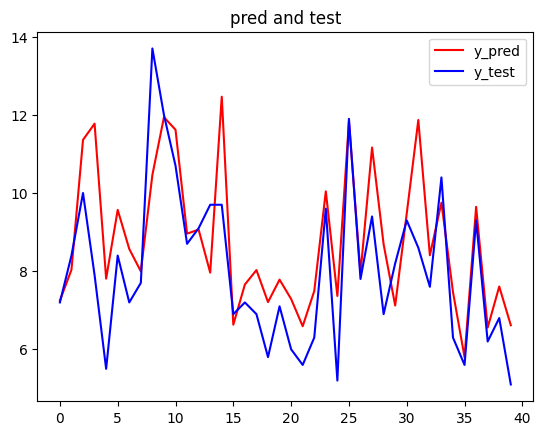

In [ ]:
# 預測值與其對應實際值折線圖
item = range(len(y_test))


plt.plot(item, y_pred, 'r', label='y_pred')

plt.plot(item, y_test, 'b', label='y_test')
plt.title('pred and test')
plt.legend()
plt.show()

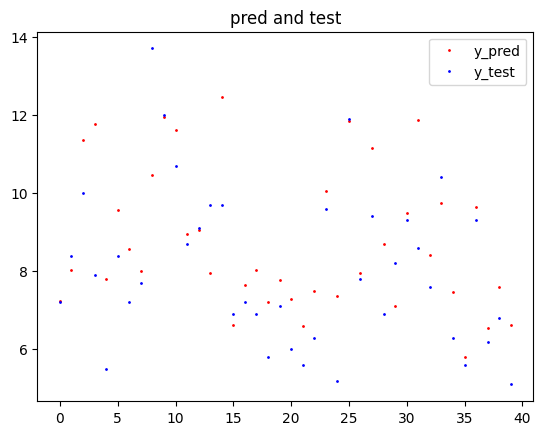

In [ ]:
# 預測值與其對應實際值點狀圖
item = range(len(y_test))


plt.plot(item, y_pred, 'o', markersize=1, color='r', label='y_pred')

plt.plot(item, y_test, 'o', markersize=1, color='b', label='y_test')
plt.title('pred and test')
plt.legend()
plt.show()

In [ ]:
# 每一筆資料誤差值
print("誤差值")
difference = []

for ii in range(len(y_pred)):
  d = float(y_test[ii]) - float(y_pred[ii])
  print(d)
  difference.append(d)

誤差值
-0.046531963348388494
0.36403598785400426
-1.3612251281738281
-3.87537727355957
-2.3086915016174316
-1.1687408447265621
-1.36881046295166
-0.2965162277221678
3.2359897613525384
0.0589752197265625
-0.9200799942016609
-0.26046829223632884
0.03586921691894496
1.7372867584228509
-2.765318679809571
0.26850214004516637
-0.45877056121826154
-1.1284976959228512
-1.4083392143249513
-0.6833905220031742
-1.2877521514892578
-0.9909733772277836
-1.1915804862976076
-0.4438604354858402
-2.1652620315551756
0.06761398315429723
-0.1537215232849123
-1.764617538452148
-1.7867599487304684
1.0787641525268548
-0.17803115844726491
-3.2685512542724613
-0.807225608825684
0.64653434753418
-1.1649248123168947
-0.19765748977661168
-0.34681243896484304
-0.3560703277587889
-0.8070713996887209
-1.5164956092834476


<ipython-input-64-02c896576a16>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  d = float(y_test[ii]) - float(y_pred[ii])


In [ ]:
difference

[-0.046531963348388494,
 0.36403598785400426,
 -1.3612251281738281,
 -3.87537727355957,
 -2.3086915016174316,
 -1.1687408447265621,
 -1.36881046295166,
 -0.2965162277221678,
 3.2359897613525384,
 0.0589752197265625,
 -0.9200799942016609,
 -0.26046829223632884,
 0.03586921691894496,
 1.7372867584228509,
 -2.765318679809571,
 0.26850214004516637,
 -0.45877056121826154,
 -1.1284976959228512,
 -1.4083392143249513,
 -0.6833905220031742,
 -1.2877521514892578,
 -0.9909733772277836,
 -1.1915804862976076,
 -0.4438604354858402,
 -2.1652620315551756,
 0.06761398315429723,
 -0.1537215232849123,
 -1.764617538452148,
 -1.7867599487304684,
 1.0787641525268548,
 -0.17803115844726491,
 -3.2685512542724613,
 -0.807225608825684,
 0.64653434753418,
 -1.1649248123168947,
 -0.19765748977661168,
 -0.34681243896484304,
 -0.3560703277587889,
 -0.8070713996887209,
 -1.5164956092834476]

In [ ]:
len(difference)

40

In [ ]:
#test difference 標準差

print("test difference : " + str(difference))

st_dif = np.std(difference)

print("Standard deviation of the test difference: " + str(st_dif))

test difference : [-0.046531963348388494, 0.36403598785400426, -1.3612251281738281, -3.87537727355957, -2.3086915016174316, -1.1687408447265621, -1.36881046295166, -0.2965162277221678, 3.2359897613525384, 0.0589752197265625, -0.9200799942016609, -0.26046829223632884, 0.03586921691894496, 1.7372867584228509, -2.765318679809571, 0.26850214004516637, -0.45877056121826154, -1.1284976959228512, -1.4083392143249513, -0.6833905220031742, -1.2877521514892578, -0.9909733772277836, -1.1915804862976076, -0.4438604354858402, -2.1652620315551756, 0.06761398315429723, -0.1537215232849123, -1.764617538452148, -1.7867599487304684, 1.0787641525268548, -0.17803115844726491, -3.2685512542724613, -0.807225608825684, 0.64653434753418, -1.1649248123168947, -0.19765748977661168, -0.34681243896484304, -0.3560703277587889, -0.8070713996887209, -1.5164956092834476]
Standard deviation of the test difference: 1.2604218085015078


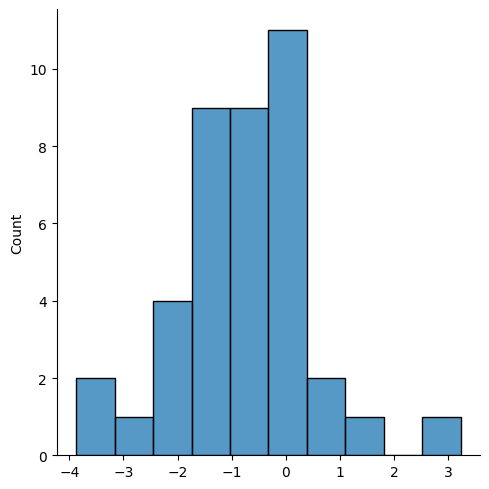

In [ ]:
# 各誤差值區間個數長條圖
import seaborn as sns
x = difference
sns.displot(x,aspect = 1)

# **輸出模型預測結果CSV**




In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# df = pd.read_csv("data.csv", index_col=0)
df = pd.read_csv("/content/drive/MyDrive/OysterData_測試數據集_40筆.csv")
df

In [ ]:
yy = df.iloc[:,:].values

In [ ]:
yy_test = yy

In [ ]:
yy_test

In [ ]:
len(yy_test)

40

In [ ]:
import csv
with open("測試CNN模型結果(20231218_O4_Color_All6Feature_CNN_e1000).csv", "w", newline="") as csvfile:
  writer = csv.writer(csvfile)

  writer.writerow(["牡蠣索引 Oyster Index",	"牡蠣編號 Oyster Number",	"牡蠣原始編號 Oyster Original Number",	"殼長 Shell Length",	"殼寬 Shell Width",	"殼高 Shell Height",	"面積 Area",	"體積 Volume",	"總重量 Total Weight",	"殼重 Shell Weight",	"肉重占總重量百分比(%) The proportion of Meat Weight in Total Weight(%)",	"雜質重 Impurity Weight",	"肉重 Meat Weight", "準確值 Accurate value", "預測值 Predicted value", "誤差值 Error value"])
  for ind in range(len(yy_test)):
    yy_test_ind = list(yy_test[ind])

    yy_test_ind.append(y_test[ind]) #準確值
    yy_test_ind.append(float(y_pred[ind])) #預測值
    yy_test_ind.append(float(y_test[ind] - y_pred[ind])) #誤差值
    writer.writerow(yy_test_ind)

  writer.writerow(["Standard deviation of the test difference:", np.std(difference)])



    # writer.writerow([1, 2, 3])
    # writer.writerow([4, 5, 6])
    # writer.writerow([7, 8, 9])

<ipython-input-83-89c409e6102f>:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  yy_test_ind.append(float(y_pred[ind])) #預測值
<ipython-input-83-89c409e6102f>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  yy_test_ind.append(float(y_test[ind] - y_pred[ind])) #誤差值


In [ ]:
import csv
with open("測試CNN模型結果(20231218_O4_Color_All6Feature_CNN_e1000).csv", "r", newline="") as csvfile:
  reader = csv.reader(csvfile)
  for row in reader:
    print(row) # row 是 List 的型態，可以用 print(row[0], row[1], row[2]) 分別取得印出

['牡蠣索引 Oyster Index', '牡蠣編號 Oyster Number', '牡蠣原始編號 Oyster Original Number', '殼長 Shell Length', '殼寬 Shell Width', '殼高 Shell Height', '面積 Area', '體積 Volume', '總重量 Total Weight', '殼重 Shell Weight', '肉重占總重量百分比(%) The proportion of Meat Weight in Total Weight(%)', '雜質重 Impurity Weight', '肉重 Meat Weight', '準確值 Accurate value', '預測值 Predicted value', '誤差值 Error value']
['1.0', '1.0', '1.0', '6.8', '4.8', '3.7', '32.64', '120.768', '37.7', '29.6', '0.1909814324', '0.9', '7.2', '7.2', '7.246531963348389', '-0.04653215408325195']
['3.0', '3.0', '3.0', '8.1', '4.1', '2.4', '33.21', '79.704', '33.0', '24.0', '0.2545454545', '0.6', '8.4', '8.4', '8.035964012145996', '0.36403560638427734']
['4.0', '4.0', '4.0', '8.9', '5.2', '2.8', '46.28', '129.584', '55.7', '43.7', '0.1795332136', '2.0', '10.0', '10.0', '11.361225128173828', '-1.3612251281738281']
['5.0', '5.0', '5.0', '8.2', '6.2', '3.1', '50.84', '157.604', '57.7', '49.7', '0.136915078', '0.1', '7.9', '7.9', '11.77537727355957', '-3.87537717819

In [ ]:
# 測試CNN模型結果表
df_test = pd.read_csv("測試CNN模型結果(20231218_O4_Color_All6Feature_CNN_e1000).csv")
df_test

# **依據實際重量由小到大排序與其預測重量做分析_e1000**

In [ ]:
def BubbleSort(data,data2):
    n = len(data)
    while n > 1:
        n-=1
        for i in range(n):
            if data[i] > data[i+1]:
                data[i], data[i+1] = data[i+1], data[i]
                data2[i], data2[i+1] = data2[i+1], data2[i]
    return data,data2

In [ ]:
y_test.shape

(40,)

In [ ]:
y_test

array([ 7.2,  8.4, 10. ,  7.9,  5.5,  8.4,  7.2,  7.7, 13.7, 12. , 10.7,
        8.7,  9.1,  9.7,  9.7,  6.9,  7.2,  6.9,  5.8,  7.1,  6. ,  5.6,
        6.3,  9.6,  5.2, 11.9,  7.8,  9.4,  6.9,  8.2,  9.3,  8.6,  7.6,
       10.4,  6.3,  5.6,  9.3,  6.2,  6.8,  5.1])

In [ ]:
y_pred.shape

(40, 1)

In [ ]:
y_pred

array([[ 7.246532 ],
       [ 8.035964 ],
       [11.361225 ],
       [11.775377 ],
       [ 7.8086915],
       [ 9.568741 ],
       [ 8.56881  ],
       [ 7.996516 ],
       [10.46401  ],
       [11.941025 ],
       [11.62008  ],
       [ 8.960468 ],
       [ 9.064131 ],
       [ 7.9627132],
       [12.465319 ],
       [ 6.631498 ],
       [ 7.6587706],
       [ 8.028498 ],
       [ 7.208339 ],
       [ 7.7833905],
       [ 7.287752 ],
       [ 6.5909734],
       [ 7.4915805],
       [10.04386  ],
       [ 7.365262 ],
       [11.832386 ],
       [ 7.9537215],
       [11.164618 ],
       [ 8.68676  ],
       [ 7.121236 ],
       [ 9.478031 ],
       [11.868551 ],
       [ 8.407226 ],
       [ 9.753466 ],
       [ 7.464925 ],
       [ 5.7976575],
       [ 9.646812 ],
       [ 6.5560703],
       [ 7.6070714],
       [ 6.6164956]], dtype=float32)

In [ ]:
y_test_sort = y_test.reshape(y_test.shape[0])
y_pred_sort = y_pred.reshape(y_pred.shape[0])

In [ ]:
y_test_sort.shape

(40,)

In [ ]:
y_pred_sort.shape

(40,)

In [ ]:
y_test_sort

array([ 7.2,  8.4, 10. ,  7.9,  5.5,  8.4,  7.2,  7.7, 13.7, 12. , 10.7,
        8.7,  9.1,  9.7,  9.7,  6.9,  7.2,  6.9,  5.8,  7.1,  6. ,  5.6,
        6.3,  9.6,  5.2, 11.9,  7.8,  9.4,  6.9,  8.2,  9.3,  8.6,  7.6,
       10.4,  6.3,  5.6,  9.3,  6.2,  6.8,  5.1])

In [ ]:
y_pred_sort

array([ 7.246532 ,  8.035964 , 11.361225 , 11.775377 ,  7.8086915,
        9.568741 ,  8.56881  ,  7.996516 , 10.46401  , 11.941025 ,
       11.62008  ,  8.960468 ,  9.064131 ,  7.9627132, 12.465319 ,
        6.631498 ,  7.6587706,  8.028498 ,  7.208339 ,  7.7833905,
        7.287752 ,  6.5909734,  7.4915805, 10.04386  ,  7.365262 ,
       11.832386 ,  7.9537215, 11.164618 ,  8.68676  ,  7.121236 ,
        9.478031 , 11.868551 ,  8.407226 ,  9.753466 ,  7.464925 ,
        5.7976575,  9.646812 ,  6.5560703,  7.6070714,  6.6164956],
      dtype=float32)

In [ ]:
BubbleSort(y_test_sort,y_pred_sort)

print(y_test_sort)
print(y_pred_sort)

[ 5.1  5.2  5.5  5.6  5.6  5.8  6.   6.2  6.3  6.3  6.8  6.9  6.9  6.9
  7.1  7.2  7.2  7.2  7.6  7.7  7.8  7.9  8.2  8.4  8.4  8.6  8.7  9.1
  9.3  9.3  9.4  9.6  9.7  9.7 10.  10.4 10.7 11.9 12.  13.7]
[ 6.6164956  7.365262   7.8086915  6.5909734  5.7976575  7.208339
  7.287752   6.5560703  7.4915805  7.464925   7.6070714  6.631498
  8.028498   8.68676    7.7833905  7.246532   8.56881    7.6587706
  8.407226   7.996516   7.9537215 11.775377   7.121236   8.035964
  9.568741  11.868551   8.960468   9.064131   9.478031   9.646812
 11.164618  10.04386    7.9627132 12.465319  11.361225   9.753466
 11.62008   11.832386  11.941025  10.46401  ]


In [ ]:
pip install matplotlib

In [ ]:
import matplotlib.pyplot as plt

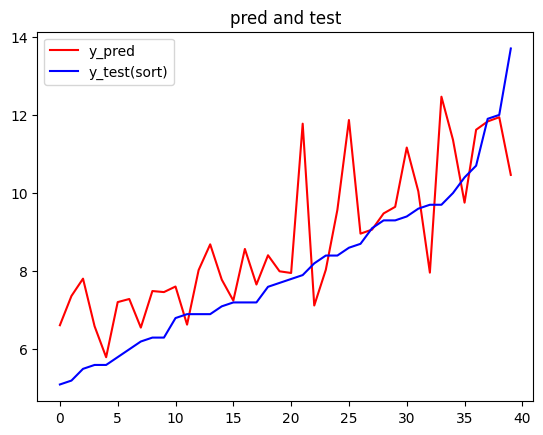

In [ ]:
# 預測值與其對應實際值折線圖(依據實際重量由小到大排序)
item = range(len(y_test))


plt.plot(item, y_pred, 'r', label='y_pred')

plt.plot(item, y_test, 'b', label='y_test(sort)')
plt.title('pred and test')
plt.legend()
plt.show()